In [2]:
### Importing Necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

import nltk
nltk.download('punkt')

### Ignoring the warnings
import warnings
warnings.filterwarnings("ignore")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


In [3]:
# Read in data
df = pd.read_csv('All_reviews.csv')
print(df.shape)

(1206, 4)


In [4]:
### Checking first 5 rows
df.head(5)

,Customer Name,Ratings,Review Title,Reviews
0,emmanuel,4.0 out of 5 stars,Good,No autoduplex function.
1,manoj,4.0 out of 5 stars,NOT A WIFI PRODUCT,GOOD PRODUCT SO FAR
2,Nikunj,3.0 out of 5 stars,scan problem,scan colity are very bad
3,Superb product. Very usefull,5.0 out of 5 stars,Very usefull,Easy to assemble and very durable
4,CA MADHU SUDHAN.S,4.0 out of 5 stars,Most preferable product,Very useful for office use and good functional...


### Data Preprocessing

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1206 entries, 0 to 1205
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Customer Name  1206 non-null   object
 1   Ratings        1206 non-null   object
 2   Review Title   1206 non-null   object
 3   Reviews        1200 non-null   object
dtypes: object(4)
memory usage: 37.8+ KB


In [6]:
### You can see the Rating colmn have object as datatype. We will change the datatype of Rating column.
df.Ratings[0]

'4.0 out of 5 stars'

In [7]:
## Slicing the numerical value
int(df.Ratings[0][0])

4

In [8]:
df['Num_rating'] = [int(df.Ratings[i][0]) for i in range(df.shape[0])]

### Quick EDA

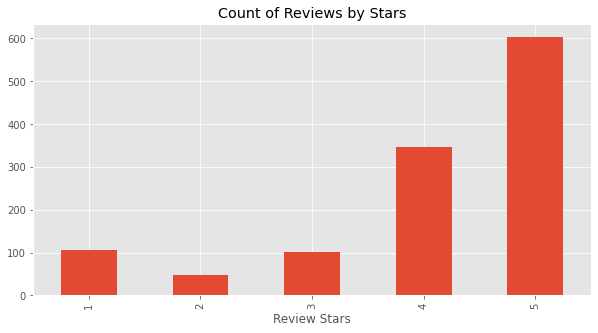

In [9]:
ax = df['Num_rating'].value_counts().sort_index() \
    .plot(kind='bar',
          title='Count of Reviews by Stars',
          figsize=(10, 5))
ax.set_xlabel('Review Stars')
plt.show()

In [10]:
### You can see most of the reviews are 5 star It means the product is good
df['Num_rating'].value_counts()

5    604
4    347
1    106
3    101
2     48
Name: Num_rating, dtype: int64

### Basic NLTK

In [11]:
example = df['Reviews'][60]
print(example)

Print Quality is V good, Scan is OK. HP does not support online for installation and other troubleshooting. This is Second printer of HP were i have faced such problem. Or else Printer is V good in this Segment for Office use.


In [12]:
### Tokenizing the sentence
tokens = nltk.word_tokenize(example)
tokens[:10]

['Print', 'Quality', 'is', 'V', 'good', ',', 'Scan', 'is', 'OK.', 'HP']

In [13]:
### Parts of speech tagging 
nltk.download('averaged_perceptron_tagger')
tagged = nltk.pos_tag(tokens)
tagged[:10]

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger.zip.


[('Print', 'NNP'),
 ('Quality', 'NNP'),
 ('is', 'VBZ'),
 ('V', 'NNP'),
 ('good', 'JJ'),
 (',', ','),
 ('Scan', 'NNP'),
 ('is', 'VBZ'),
 ('OK.', 'NNP'),
 ('HP', 'NNP')]

In [14]:
### Name Entity recognition
nltk.download('maxent_ne_chunker')
nltk.download('words')
entities = nltk.chunk.ne_chunk(tagged)
entities.pprint()

[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping chunkers\maxent_ne_chunker.zip.
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...


(S
  (PERSON Print/NNP)
  (ORGANIZATION Quality/NNP)
  is/VBZ
  V/NNP
  good/JJ
  ,/,
  (GPE Scan/NNP)
  is/VBZ
  OK./NNP
  HP/NNP
  does/VBZ
  not/RB
  support/VB
  online/NN
  for/IN
  installation/NN
  and/CC
  other/JJ
  troubleshooting/NN
  ./.
  This/DT
  is/VBZ
  Second/JJ
  printer/NN
  of/IN
  HP/NNP
  were/VBD
  i/NNS
  have/VBP
  faced/VBN
  such/JJ
  problem/NN
  ./.
  Or/CC
  else/JJ
  Printer/NNP
  is/VBZ
  V/NNP
  good/JJ
  in/IN
  this/DT
  Segment/NNP
  for/IN
  Office/NNP
  use/NN
  ./.)


[nltk_data]   Unzipping corpora\words.zip.


## Sentiment Analysis

##### For Sentiment Analysis we use two model 
##### 1. VADER Seniment Scoring from NLTK

We will use NLTK's SentimentIntensityAnalyzer to get the neg/neu/pos scores of the text.

--> This uses a "bag of words" approach:

    1. Stop words are removed

    2. each word is scored and combined to a total score.

In [15]:
### Importing Sentiment Analyzer
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm
nltk.download('vader_lexicon')

sia = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...


In [16]:
### Checking on normal sentences
sia.polarity_scores('We are so happy because of holiday.')

{'neg': 0.0, 'neu': 0.402, 'pos': 0.598, 'compound': 0.8147}

In [17]:
sia.polarity_scores(example)

{'neg': 0.102, 'neu': 0.682, 'pos': 0.216, 'compound': 0.6678}

In [18]:
# Run the polarity score on the entire dataset
res = {}
for i in range(df.shape[0]):
    try :
        text = df['Reviews'][i]
        myid = i
        res[myid] = sia.polarity_scores(text)
    except:
        print(f'{i} have some error')

16 have some error
89 have some error
355 have some error
382 have some error
416 have some error
454 have some error


In [19]:
### Creating and merging dataset
vaders = pd.DataFrame(res).T
vaders = vaders.reset_index().rename(columns={'index': 'Id'})
vaders

,Id,neg,neu,pos,compound
0,0,0.524,0.476,0.000,-0.2960
1,1,0.000,0.508,0.492,0.4404
2,2,0.487,0.513,0.000,-0.5849
3,3,0.000,0.633,0.367,0.4404
4,4,0.000,0.746,0.254,0.8016
...,...,...,...,...,...
1195,1201,0.000,0.000,1.000,0.3612
1196,1202,0.000,0.444,0.556,0.6124
1197,1203,0.000,0.417,0.583,0.4215
1198,1204,0.000,0.580,0.420,0.4404


In [20]:
df.head(10)

,Customer Name,Ratings,Review Title,Reviews,Num_rating
0,emmanuel,4.0 out of 5 stars,Good,No autoduplex function.,4
1,manoj,4.0 out of 5 stars,NOT A WIFI PRODUCT,GOOD PRODUCT SO FAR,4
2,Nikunj,3.0 out of 5 stars,scan problem,scan colity are very bad,3
3,Superb product. Very usefull,5.0 out of 5 stars,Very usefull,Easy to assemble and very durable,5
4,CA MADHU SUDHAN.S,4.0 out of 5 stars,Most preferable product,Very useful for office use and good functional...,4
5,Sunil,5.0 out of 5 stars,Good,Ver good product,5
6,Chetan Varshney,4.0 out of 5 stars,Working fine,Led light is missing in display\nEvery time lo...,4
7,Mohan. B,4.0 out of 5 stars,yes,good print very useful,4
8,Ramachandra K,4.0 out of 5 stars,Good,Digital display is very small. There is no lig...,4
9,Darshan hirpara,4.0 out of 5 stars,Best in the range,This is the far by best printer in this range ...,4


In [21]:
vaders= pd.concat([vaders,df],axis = 1)

In [22]:
vaders.head()

,Id,neg,neu,pos,compound,Customer Name,Ratings,Review Title,Reviews,Num_rating
0,0.0,0.524,0.476,0.000,-0.2960,emmanuel,4.0 out of 5 stars,Good,No autoduplex function.,4
1,1.0,0.000,0.508,0.492,0.4404,manoj,4.0 out of 5 stars,NOT A WIFI PRODUCT,GOOD PRODUCT SO FAR,4
2,2.0,0.487,0.513,0.000,-0.5849,Nikunj,3.0 out of 5 stars,scan problem,scan colity are very bad,3
3,3.0,0.000,0.633,0.367,0.4404,Superb product. Very usefull,5.0 out of 5 stars,Very usefull,Easy to assemble and very durable,5
4,4.0,0.000,0.746,0.254,0.8016,CA MADHU SUDHAN.S,4.0 out of 5 stars,Most preferable product,Very useful for office use and good functional...,4


### Plot VADER results

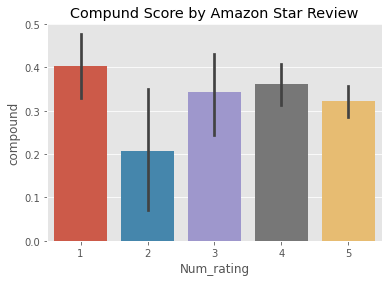

In [23]:
ax = sns.barplot(data=vaders, x='Num_rating', y='compound')
ax.set_title('Compund Score by Amazon Star Review')
plt.show()

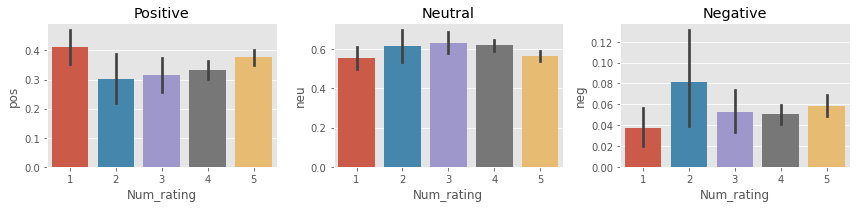

In [24]:
fig, axs = plt.subplots(1, 3, figsize=(12, 3))
sns.barplot(data=vaders, x='Num_rating', y='pos', ax=axs[0])
sns.barplot(data=vaders, x='Num_rating', y='neu', ax=axs[1])
sns.barplot(data=vaders, x='Num_rating', y='neg', ax=axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.tight_layout()
plt.show()

You can see results are not good because the positive score for star five want to greater than any star review and Neagative review 5 star review want to be less.

That's why we are using different model 

### 2.Roberta Pretrained Model From Hugging Face

In [25]:
### Importing necessary libraries
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

In [26]:
### downloading pretrained model
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

In [27]:
# VADER results on example
print(example)
sia.polarity_scores(example)

Print Quality is V good, Scan is OK. HP does not support online for installation and other troubleshooting. This is Second printer of HP were i have faced such problem. Or else Printer is V good in this Segment for Office use.


{'neg': 0.102, 'neu': 0.682, 'pos': 0.216, 'compound': 0.6678}

In [28]:
# Run for Roberta Model
encoded_text = tokenizer(example, return_tensors='pt')
output = model(**encoded_text)
scores = output[0][0].detach().numpy()
scores = softmax(scores)
scores_dict = {
    'roberta_neg' : scores[0],
    'roberta_neu' : scores[1],
    'roberta_pos' : scores[2]
}
print(scores_dict)

{'roberta_neg': 0.2394576, 'roberta_neu': 0.45111907, 'roberta_pos': 0.30942327}


In [29]:
### Making a function to run on dataset
def polarity_scores_roberta(example):
    encoded_text = tokenizer(example, return_tensors='pt')
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    scores_dict = {
        'roberta_neg' : scores[0],
        'roberta_neu' : scores[1],
        'roberta_pos' : scores[2]
    }
    return scores_dict

In [30]:
# Run the polarity score on the entire dataset
res = {}
for i in range(df.shape[0]):
    try :
        text = df['Reviews'][i]
        myid = i
        roberta_result = polarity_scores_roberta(text)
        res[myid] = roberta_result
    except:
        print(f'{i} have some error')

16 have some error
89 have some error
355 have some error
382 have some error
416 have some error
454 have some error


In [31]:
### lets check in which reviews we are getting error 
print(df['Reviews'][16])
print(df['Reviews'][89])
print(df['Reviews'][355])
print(df['Reviews'][382])
print(df['Reviews'][416])
print(df['Reviews'][454])

nan
nan
nan
nan
nan
nan


In [32]:
results_df = pd.DataFrame(res).T
results_df = results_df.reset_index().rename(columns={'index': 'Id'})
results_df

,Id,roberta_neg,roberta_neu,roberta_pos
0,0,0.324040,0.618809,0.057151
1,1,0.004369,0.050265,0.945365
2,2,0.967077,0.030139,0.002784
3,3,0.006317,0.123366,0.870317
4,4,0.002053,0.034552,0.963395
...,...,...,...,...
1195,1201,0.203537,0.571345,0.225118
1196,1202,0.003164,0.039097,0.957739
1197,1203,0.003053,0.031870,0.965077
1198,1204,0.006225,0.167283,0.826492


In [33]:
### Merging the dataset of roberta and vaders for good visualization
results_df =  results_df.merge(vaders, how='left')
results_df

,Id,roberta_neg,roberta_neu,roberta_pos,neg,neu,pos,compound,Customer Name,Ratings,Review Title,Reviews,Num_rating
0,0,0.324040,0.618809,0.057151,0.524,0.476,0.000,-0.2960,emmanuel,4.0 out of 5 stars,Good,No autoduplex function.,4
1,1,0.004369,0.050265,0.945365,0.000,0.508,0.492,0.4404,manoj,4.0 out of 5 stars,NOT A WIFI PRODUCT,GOOD PRODUCT SO FAR,4
2,2,0.967077,0.030139,0.002784,0.487,0.513,0.000,-0.5849,Nikunj,3.0 out of 5 stars,scan problem,scan colity are very bad,3
3,3,0.006317,0.123366,0.870317,0.000,0.633,0.367,0.4404,Superb product. Very usefull,5.0 out of 5 stars,Very usefull,Easy to assemble and very durable,5
4,4,0.002053,0.034552,0.963395,0.000,0.746,0.254,0.8016,CA MADHU SUDHAN.S,4.0 out of 5 stars,Most preferable product,Very useful for office use and good functional...,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,1201,0.203537,0.571345,0.225118,0.000,0.000,1.000,0.3612,SANJAYAN,4.0 out of 5 stars,Four Stars,good,4
1196,1202,0.003164,0.039097,0.957739,0.000,0.444,0.556,0.6124,Firdausi,1.0 out of 5 stars,Wireless Network option doesn't work,Wireless network option doesn't work on window...,1
1197,1203,0.003053,0.031870,0.965077,0.000,0.417,0.583,0.4215,Siddhant Garde,5.0 out of 5 stars,Excellent printer,"Excellent and intelligent printer, can do many...",5
1198,1204,0.006225,0.167283,0.826492,0.000,0.580,0.420,0.4404,Ramachandra Prasad,4.0 out of 5 stars,Four Stars,It is working good. Delivered in time,4


In [34]:
results_df.columns

Index(['Id', 'roberta_neg', 'roberta_neu', 'roberta_pos', 'neg', 'neu', 'pos',
       'compound', 'Customer Name', 'Ratings', 'Review Title', 'Reviews',
       'Num_rating'],
      dtype='object')

### Combine and compare

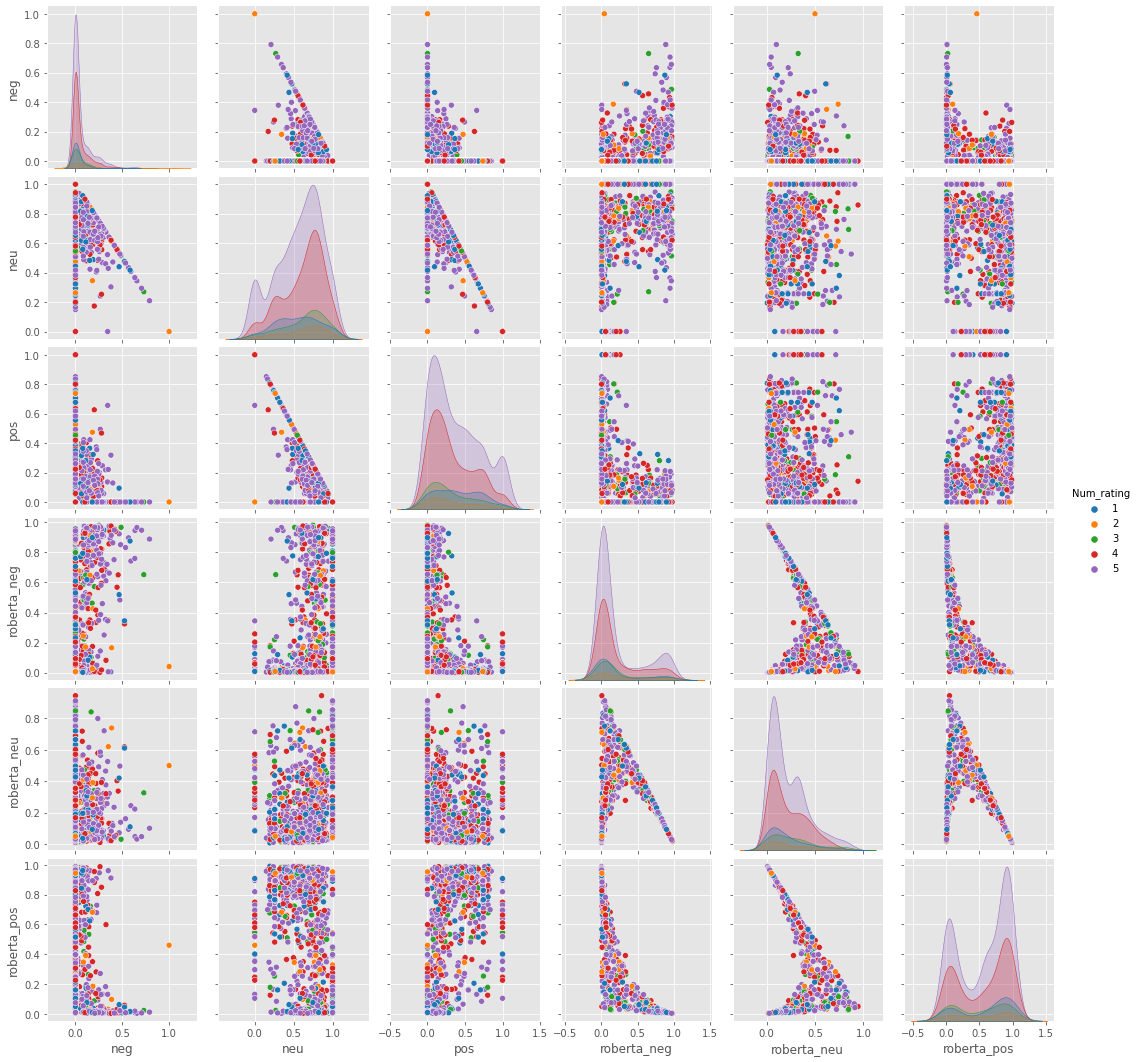

In [35]:
sns.pairplot(data=results_df,
             vars=['neg', 'neu', 'pos',
                  'roberta_neg', 'roberta_neu', 'roberta_pos'],
            hue='Num_rating',
            palette='tab10')
plt.show()

### Lets check some reviews 

#### Positive 1-Star and Negative 5-Star Review

Lets look at some examples where the model scoring and review score differ the most.

##### Positive Sentiment 1 Star View

In [36]:
results_df.query('Num_rating == 1') \
    .sort_values('roberta_pos', ascending=False)['Reviews'].values[0]

'Printer stopped working after 2 weeks, when called HP support after 1hr of requesting, they agreed to send service guy.\n\nHe gave us shock of life when he told Toner is empty, after printing only 200 pages.\n\nHe said toner needs to be replaced.\n\nHow it is possible?? I can’t return product as return window expired. What options I have??\n\nNever buy on Amazon.\nNever buy on Amazon.'

In [37]:
results_df.query('Num_rating == 1') \
    .sort_values('pos', ascending=False)['Reviews'].values[0]

'???????? ?????? ?????? ??? ??? ???? ???? ??? hp ?? ??? product ?? ????\nI HATE HP COMPANY'

###### nevative sentiment 5-Star view

In [38]:
results_df.query('Num_rating == 5') \
    .sort_values('roberta_neg', ascending=False)['Reviews'].values[0]

'Good'

In [39]:
results_df.query('Num_rating == 5') \
    .sort_values('neg', ascending=False)['Reviews'].values[0]

'Nice product'

As you can see our both models are not very good that why we are using Transformer Pipeline to do sentiment analysis.

### The Transformers Pipeline

In [40]:
from transformers import pipeline

sent_pipeline = pipeline("sentiment-analysis")

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


In [41]:
sent_pipeline('I love HP Products')

[{'label': 'POSITIVE', 'score': 0.9997363686561584}]

In [42]:
sent_pipeline('This product is very bad')

[{'label': 'NEGATIVE', 'score': 0.9998083710670471}]

### Lets Check all models on A example reviews

In [43]:
print(example)

Print Quality is V good, Scan is OK. HP does not support online for installation and other troubleshooting. This is Second printer of HP were i have faced such problem. Or else Printer is V good in this Segment for Office use.


In [44]:
### Vaders Result
sia.polarity_scores(example)

{'neg': 0.102, 'neu': 0.682, 'pos': 0.216, 'compound': 0.6678}

In [45]:
#### Roberta Model result
result = polarity_scores_roberta(example)
result

{'roberta_neg': 0.2394576,
 'roberta_neu': 0.45111907,
 'roberta_pos': 0.30942327}

In [46]:
#### Tensorflow Pipeline
sent_pipeline(example)

[{'label': 'NEGATIVE', 'score': 0.7626401782035828}]

In [47]:
#### defining functions
def vander_sent(word):
    if word == 'neg':
        return 'Complaint'
    elif word == 'neu':
        return  'Suggestion'
    else:
        return 'Appreciation'
    
def roberta_sent(word):
    if word == 'roberta_neg':
        return 'Complaint'
    elif word == 'roberta_neu':
        return  'Suggestion'
    else:
        return 'Appreciation'
    
def pipe_sent(word):
    if word == 'NEGATIVE':
        return 'Complaint'
    elif word == 'POSITIVE':
        return  'Appreciation'
    else:
        return 'Suggestion'

### Easy to Check Sentiment

In [48]:
review = input("Enter product review: ")
Tv = sia.polarity_scores(review)
Tv1 = polarity_scores_roberta(review)
sen_vader = vander_sent(max(Tv, key= lambda x: Tv[x]))
sen_roberta = roberta_sent(max(Tv1, key= lambda x: Tv1[x]))
sen_pipeline = pipe_sent(sent_pipeline(review)[0]['label'])
print('\n')
print(f'Sentiment of the review Using Vaders model is {sen_vader}.')
print('\n')
print(f'Sentiment of the review Using Roberta model is {sen_roberta}.')
print('\n')
print(f'Sentiment of the review Using Transformer Pipeline: {sen_pipeline}.')

Enter product review: Instructions were very poor, even for something as simple as ink cartridge installation. Construction was very cheap feeling plastic. Paper feeder jammed and fed multiple sheets. To cap it off the print quality was terrible, it skipped part of every third line. I have had HP printers for many years and this is the worst example of a personal printer that I have seen. it did hook up to my wireless without any problems. Returned this to the supplier, ended up paying for return. Waiting to see if the third party vendor will refund the return shipping costs. I would not recommend this printer.


Sentiment of the review Using Vaders model is Suggestion.


Sentiment of the review Using Roberta model is Complaint.


Sentiment of the review Using Transformer Pipeline: Complaint.


In [49]:
sent_df = df.copy()
sent_df.head()

,Customer Name,Ratings,Review Title,Reviews,Num_rating
0,emmanuel,4.0 out of 5 stars,Good,No autoduplex function.,4
1,manoj,4.0 out of 5 stars,NOT A WIFI PRODUCT,GOOD PRODUCT SO FAR,4
2,Nikunj,3.0 out of 5 stars,scan problem,scan colity are very bad,3
3,Superb product. Very usefull,5.0 out of 5 stars,Very usefull,Easy to assemble and very durable,5
4,CA MADHU SUDHAN.S,4.0 out of 5 stars,Most preferable product,Very useful for office use and good functional...,4


In [50]:
sent_df['vander_mdl'] = ' '
sent_df['robert_mdl'] = ' '
sent_df['transformer_pipeline'] = ' '

for i in range(df.shape[0]):
    try:
        review = df['Reviews'][i]
        Tv = sia.polarity_scores(review)
        Tv1 = polarity_scores_roberta(review)
        sent_df['vander_mdl'][i] = vander_sent(max(Tv, key= lambda x: Tv[x]))
        sent_df['robert_mdl'][i] = roberta_sent(max(Tv1, key= lambda x: Tv1[x]))
        sent_df['transformer_pipeline'][i] = pipe_sent(sent_pipeline(review)[0]['label'])
    except:
        print(f"Error at {i}")

Error at 16
Error at 89
Error at 355
Error at 382
Error at 416
Error at 454


In [51]:
sent_df

,Customer Name,Ratings,Review Title,Reviews,Num_rating,vander_mdl,robert_mdl,transformer_pipeline
0,emmanuel,4.0 out of 5 stars,Good,No autoduplex function.,4,Complaint,Suggestion,Complaint
1,manoj,4.0 out of 5 stars,NOT A WIFI PRODUCT,GOOD PRODUCT SO FAR,4,Suggestion,Appreciation,Appreciation
2,Nikunj,3.0 out of 5 stars,scan problem,scan colity are very bad,3,Suggestion,Complaint,Complaint
3,Superb product. Very usefull,5.0 out of 5 stars,Very usefull,Easy to assemble and very durable,5,Suggestion,Appreciation,Appreciation
4,CA MADHU SUDHAN.S,4.0 out of 5 stars,Most preferable product,Very useful for office use and good functional...,4,Appreciation,Appreciation,Appreciation
...,...,...,...,...,...,...,...,...
1201,Sanjeev Kumar,5.0 out of 5 stars,Nice,Like,5,Appreciation,Suggestion,Appreciation
1202,Balajee,4.0 out of 5 stars,Four Stars,Good product.. Everything works well\n..,4,Appreciation,Appreciation,Appreciation
1203,Manas,5.0 out of 5 stars,Nice product,It's a nice product,5,Appreciation,Appreciation,Appreciation
1204,Amazon Customer,5.0 out of 5 stars,Good printer,Good printer for wifi too.,5,Suggestion,Appreciation,Appreciation


In [52]:
sent_df.to_csv('All_Review_Results.csv')

#### The End